In [ ]:
from google.colab import userdata
import os

OPENAI_API_KEY = userdata.get('secretName')

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

In [ ]:

from langchain_openai import ChatOpenAI

chatModel = ChatOpenAI(model="gpt-3.5-turbo-0125")

In [ ]:
messages = [
    ("system", "You are an helpful assistant."),
    ("human", "tell me about dswithbappy"),
]
response = chatModel.invoke(messages)
print(response.content)

In [2]:
!pip install langchain_community langchain_openai chromadb tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:0

#Vector Stores (aka. Vector Databases) Or Chroma DB

In [3]:
!pip install langchain_community langchain_openai chromadb tiktoken

In [5]:
from google.colab import userdata
import os

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

In [6]:
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain.vectorstores import Chroma

# Load the document, split it into chunks, embed each chunk and load it into the vector store.
loaded_document = TextLoader('state_of_the_union.txt').load()

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

chunks_of_text = text_splitter.split_documents(loaded_document)

In [7]:
len(chunks_of_text)

42

In [8]:
vector_db = Chroma.from_documents(chunks_of_text, OpenAIEmbeddings())

In [10]:
question = "What did the president say about the John Lewis Voting Rights Act?"

In [11]:
response = vector_db.similarity_search(question)

In [12]:
print(response[0].page_content)

Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. 

Tonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. 

One of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. 

And I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.


#Vector Store as Retriever or FAISS

In [15]:
!pip install faiss_cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 49.6 MB/s eta 0:00:00


In [13]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("state_of_the_union.txt")

In [16]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter

loaded_document = loader.load()

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

chunks_of_text = text_splitter.split_documents(loaded_document)

embeddings = OpenAIEmbeddings()

vector_db = FAISS.from_documents(chunks_of_text, embeddings)

In [17]:
retriever = vector_db.as_retriever(search_kwargs={"k": 1})

In [18]:
response = retriever.invoke("what did he say about ketanji brown jackson?")

In [19]:
response

[Document(id='d0dd3a8a-2911-476e-b2b0-5b21110fd676', metadata={'source': 'state_of_the_union.txt'}, page_content='Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. \n\nTonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. \n\nOne of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. \n\nAnd I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.')]

In [20]:
len(response)

1

In [21]:
response[0].page_content

'Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. \n\nTonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. \n\nOne of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. \n\nAnd I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.'

In [22]:
print(response[0].page_content)

Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. 

Tonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. 

One of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. 

And I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.


In [23]:
retriever = vector_db.as_retriever(search_kwargs={"k": 3})

In [24]:
response = retriever.invoke("what did he say about ketanji brown jackson?")

In [25]:
response

[Document(id='d0dd3a8a-2911-476e-b2b0-5b21110fd676', metadata={'source': 'state_of_the_union.txt'}, page_content='Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. \n\nTonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. \n\nOne of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. \n\nAnd I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.'),
 Document(id='bd656d10-4b29-4c24-b2aa-06bd2904fcf2', metadata={'source': 'state_of_the_un

In [26]:
len(response)

3

In [27]:
doc1 = response[0]

In [30]:
doc1

Document(id='d0dd3a8a-2911-476e-b2b0-5b21110fd676', metadata={'source': 'state_of_the_union.txt'}, page_content='Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. \n\nTonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. \n\nOne of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. \n\nAnd I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.')

In [32]:
print(doc1.page_content)

Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. 

Tonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. 

One of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. 

And I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.


In [28]:
doc2 = response[1]

In [33]:
print(doc2.page_content)

A former top litigator in private practice. A former federal public defender. And from a family of public school educators and police officers. A consensus builder. Since she’s been nominated, she’s received a broad range of support—from the Fraternal Order of Police to former judges appointed by Democrats and Republicans. 

And if we are to advance liberty and justice, we need to secure the Border and fix the immigration system. 

We can do both. At our border, we’ve installed new technology like cutting-edge scanners to better detect drug smuggling.  

We’ve set up joint patrols with Mexico and Guatemala to catch more human traffickers.  

We’re putting in place dedicated immigration judges so families fleeing persecution and violence can have their cases heard faster. 

We’re securing commitments and supporting partners in South and Central America to host more refugees and secure their own borders.


In [29]:
doc3 = response[2]

In [34]:
print(doc3.page_content)

But cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body. 

Danielle says Heath was a fighter to the very end. 

He didn’t know how to stop fighting, and neither did she. 

Through her pain she found purpose to demand we do better. 

Tonight, Danielle—we are. 

The VA is pioneering new ways of linking toxic exposures to diseases, already helping more veterans get benefits. 

And tonight, I’m announcing we’re expanding eligibility to veterans suffering from nine respiratory cancers. 

I’m also calling on Congress: pass a law to make sure veterans devastated by toxic exposures in Iraq and Afghanistan finally get the benefits and comprehensive health care they deserve. 

And fourth, let’s end cancer as we know it. 

This is personal to me and Jill, to Kamala, and to so many of you. 

Cancer is the #2 cause of death in America–second only to heart disease.


#RAG

In [36]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 7.4 MB/s eta 0:00:00


In [38]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("attention.pdf")
docs = loader.load()


In [40]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)

In [41]:
documents=text_splitter.split_documents(docs)

In [43]:
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS

db=FAISS.from_documents(documents[:30],OpenAIEmbeddings())


In [44]:
query="An attention function can be described as mapping a query "
result=db.similarity_search(query)

In [45]:
result[0].page_content

'Decoder: The decoder is also composed of a stack of N = 6identical layers. In addition to the two\nsub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head\nattention over the output of the encoder stack. Similar to the encoder, we employ residual connections\naround each of the sub-layers, followed by layer normalization. We also modify the self-attention\nsub-layer in the decoder stack to prevent positions from attending to subsequent positions. This\nmasking, combined with fact that the output embeddings are offset by one position, ensures that the\npredictions for position i can depend only on the known outputs at positions less than i.\n3.2 Attention\nAn attention function can be described as mapping a query and a set of key-value pairs to an output,\nwhere the query, keys, values, and output are all vectors. The output is computed as a weighted sum\n3'

In [46]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-3.5-turbo-0125")

In [47]:
## Design ChatPrompt Template
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context.
Think step by step before providing a detailed answer.
I will tip you $1000 if the user finds the answer helpful.
<context>
{context}
</context>
Question: {input}""")

In [48]:
## Chain Introduction
## Create Stuff Docment Chain

from langchain.chains.combine_documents import create_stuff_documents_chain

document_chain=create_stuff_documents_chain(llm,prompt)

In [49]:
"""
Retrievers: A retriever is an interface that returns documents given
 an unstructured query. It is more general than a vector store.
 A retriever does not need to be able to store documents, only to
 return (or retrieve) them. Vector stores can be used as the backbone
 of a retriever, but there are other types of retrievers as well.
 https://python.langchain.com/docs/modules/data_connection/retrievers/
"""

retriever=db.as_retriever()

In [51]:
"""
Retrieval chain:This chain takes in a user inquiry, which is then
passed to the retriever to fetch relevant documents. Those documents
(and original inputs) are then passed to an LLM to generate a response
https://python.langchain.com/docs/modules/chains/
"""
from langchain.chains import create_retrieval_chain
retrieval_chain=create_retrieval_chain(retriever,document_chain)

In [52]:
response=retrieval_chain.invoke({"input":"Scaled Dot-Product Attention"})

In [54]:
response['answer']

"Scaled Dot-Product Attention is a mechanism used in the Transformer model for computing the weights assigned to values based on the compatibility between queries and keys. It involves computing dot products of queries with keys, dividing them by the square root of the dimension of keys, and applying a softmax function to obtain the weights on the values. This attention mechanism is efficient and can be implemented using optimized matrix multiplication code. It is a key component of the Transformer model's attention mechanism, along with Multi-Head Attention, which allows the model to jointly attend to information from different representation subspaces."

#MNR

In [55]:
from langchain.document_loaders import DirectoryLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.document_loaders import WebBaseLoader

In [56]:
# Loading a single website
loader = WebBaseLoader("http://www.paulgraham.com/wealth.html")
docs = loader.load()

# Split your website into big chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=0)
chunks = text_splitter.split_documents(docs)

print (f"Your {len(docs)} documents have been split into {len(chunks)} chunks")

Your 1 documents have been split into 28 chunks


In [57]:
embedding = OpenAIEmbeddings()
vectordb = Chroma.from_documents(documents=chunks, embedding=embedding)

In [58]:
retriever_vanilla = vectordb.as_retriever(search_type="similarity", search_kwargs={"k": 8})

In [59]:
retriever_mmr = vectordb.as_retriever(search_type="mmr", search_kwargs={"k": 8})

In [60]:
import warnings
warnings.filterwarnings("ignore")

vanilla_relevant_docs = retriever_vanilla.get_relevant_documents("What is the best way to make and keep wealth?")

In [61]:
mmr_relevant_docs = retriever_mmr.get_relevant_documents("What is the best way to make and keep wealth?")

In [62]:
def analyze_list_overlap(list1, list2, content_attr='page_content'):
    """
    Analyze the overlap and uniqueness between two lists of objects using a specified content attribute.

    Parameters:
    list1 (list): The first list of objects to compare.
    list2 (list): The second list of objects to compare.
    content_attr (str): The attribute name of the content to use for comparison.

    Returns:
    dict: A dictionary with counts of overlapping, unique to list1, unique to list2 items,
          and total counts for each list.
    """
    # Extract unique content attributes from the lists
    set1_contents = {getattr(doc, content_attr) for doc in list1}
    set2_contents = {getattr(doc, content_attr) for doc in list2}

    # Find the number of overlapping content attributes
    overlap_contents = set1_contents & set2_contents
    overlap_count = len(overlap_contents)

    # Find the unique content attributes in each list
    unique_to_list1_contents = set1_contents - set2_contents
    unique_to_list2_contents = set2_contents - set1_contents
    unique_to_list1_count = len(unique_to_list1_contents)
    unique_to_list2_count = len(unique_to_list2_contents)

    # Use the unique content attributes to retrieve the unique objects
    unique_to_list1 = [doc for doc in list1 if getattr(doc, content_attr) in unique_to_list1_contents]
    unique_to_list2 = [doc for doc in list2 if getattr(doc, content_attr) in unique_to_list2_contents]

    # Count the total number of items in each list
    total_list1 = len(list1)
    total_list2 = len(list2)

    # Return the results in a dictionary
    return {
        'total_list1': total_list1,
        'total_list2': total_list2,
        'overlap_count': overlap_count,
        'unique_to_list1_count': unique_to_list1_count,
        'unique_to_list2_count': unique_to_list2_count,
    }

In [63]:
analyze_list_overlap(vanilla_relevant_docs, mmr_relevant_docs)

{'total_list1': 8,
 'total_list2': 8,
 'overlap_count': 5,
 'unique_to_list1_count': 3,
 'unique_to_list2_count': 3}

#Create RAG Pipeline

In [65]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.7 MB/s eta 0:00:00


In [66]:
from datasets import load_dataset

# Load a sample dataset
philo_dataset = load_dataset("datastax/philosopher-quotes")["train"]
print("An example entry:")
print(philo_dataset[16])

README.md:   0%|          | 0.00/574 [00:00<?, ?B/s]

philosopher-quotes.csv:   0%|          | 0.00/67.6k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/450 [00:00<?, ? examples/s]

An example entry:
{'author': 'aristotle', 'quote': 'Love well, be loved and do something of value.', 'tags': 'love;ethics'}


In [67]:
from langchain.schema import Document

# Constructs a set of documents from your data. Documents can be used as inputs to your vector store.
docs = []
for entry in philo_dataset:
    metadata = {"author": entry["author"]}
    if entry["tags"]:
        # Add metadata tags to the metadata dictionary
        for tag in entry["tags"].split(";"):
            metadata[tag] = "y"
    # Create a LangChain document with the quote and metadata tags
    doc = Document(page_content=entry["quote"], metadata=metadata)
    docs.append(doc)

In [71]:
# Create embeddings by inserting your documents into the vector store.
faiss_index = FAISS.from_documents(docs, OpenAIEmbeddings())
inserted_ids = faiss_index.add_documents(docs)
print(f"\nInserted {len(inserted_ids)} documents.")


Inserted 450 documents.


##Basic Retrieval

In [75]:
from langchain.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough

retriever = faiss_index.as_retriever(search_kwargs={"k": 3})

In [76]:
prompt_template = """
Answer the question based only on the supplied context. If you don't know the answer, say you don't know the answer.
Context: {context}
Question: {question}
Your answer:
"""
prompt = ChatPromptTemplate.from_template(prompt_template)
model = ChatOpenAI()

chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [77]:
response = chain.invoke("In the given context, what is the most important to allow the brain and provide me the tags?")

In [79]:
print(response)

The most important thing in the given context is to allow the brain the full measure of sleep required to restore it. The tags associated with the documents are: author: schopenhauer, ethics: y, knowledge: y.


#Advanced Retrievals

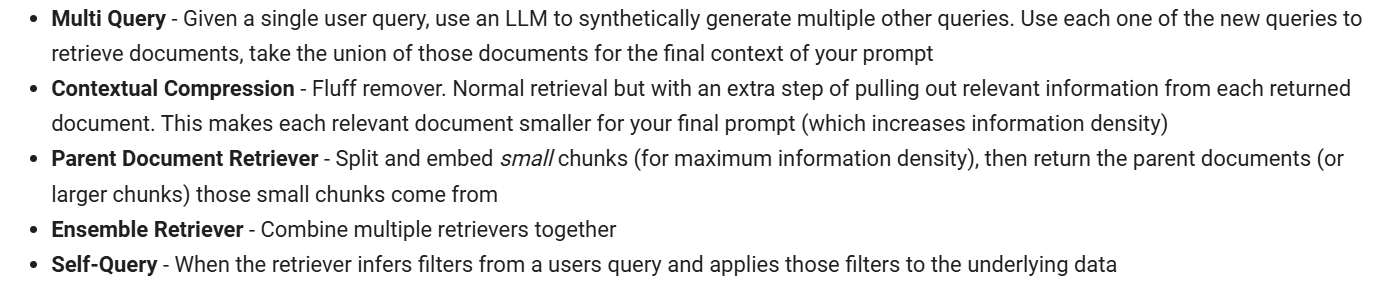

In [80]:
from langchain.document_loaders import DirectoryLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
import warnings
warnings.filterwarnings("ignore")

In [81]:
!pip install unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.8/166.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 7.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=8c4c2cc37ec55d0d539816e2ce480a5b47d99a1e3de08cc1a671f8a0e38fad3b
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4

In [82]:
!unzip "/content/PaulGrahamEssaysLarge.zip" -d "/content/PaulGrahamEssaysLarge"

Archive:  /content/PaulGrahamEssaysLarge.zip
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/nft.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/love.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/weird.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/siliconvalley.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/sun.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/rss.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/mod.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/philosophy.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/vb.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/todo.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/unions.txt  
  inflating: /content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/goodtaste.txt  
  inflating: /

In [84]:
loader = DirectoryLoader('/content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/', glob="**/*.txt", show_progress=True)

docs = loader.load()

100%|██████████| 49/49 [00:13<00:00,  3.72it/s]


In [85]:
# Split
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=0)
splits = text_splitter.split_documents(docs)

print (f"Your {len(docs)} documents have been split into {len(splits)} chunks")

Your 49 documents have been split into 471 chunks


In [86]:
if 'vectordb' in globals(): # If you've already made your vectordb this will delete it so you start fresh
    vectordb.delete_collection()

embedding = OpenAIEmbeddings()

vectordb = Chroma.from_documents(documents=splits, embedding=embedding)

##MultiQuery

In [87]:
from langchain.chat_models import ChatOpenAI
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain.prompts import PromptTemplate
# Set logging for the queries
import logging

In [88]:
logging.basicConfig()
logging.getLogger("langchain.retrievers.multi_query").setLevel(logging.INFO)

In [89]:
question = "What is the authors view on the early stages of a startup?"
llm = ChatOpenAI(temperature=0,openai_api_key=OPENAI_API_KEY)

retriever_from_llm = MultiQueryRetriever.from_llm(
    retriever=vectordb.as_retriever(), llm=llm
)

In [90]:
unique_docs = retriever_from_llm.get_relevant_documents(query=question)

INFO:langchain.retrievers.multi_query:Generated queries: ['1. How does the author perceive the initial phases of a startup?', "2. What are the author's thoughts on the beginning stages of a startup?", '3. What insights does the author offer regarding the early development of a startup?']


In [91]:
len(unique_docs)

8

In [92]:
prompt_template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

{context}

Question: {question}
Answer:"""
PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

In [97]:
from langchain_core.messages import HumanMessage

response = llm(messages=[HumanMessage(
    content=PROMPT.format_prompt(
        context="".join([doc.page_content for doc in unique_docs]),
        question=question
    ).text
)])

In [98]:
response

AIMessage(content='The author believes that the key stage in the life of a startup is when they are just starting out with a minimal product and a small team, typically operating out of an apartment. This early stage is crucial for the success of a startup, and the author emphasizes the importance of releasing a version 1 quickly and improving it based on user feedback. The author also mentions that determination is the most important quality in a startup founder, rather than intelligence.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 2716, 'total_tokens': 2806, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-7f2c9293-7ace-498e-b6d6-b89bf7f6087e-0')

In [99]:
response.content

'The author believes that the key stage in the life of a startup is when they are just starting out with a minimal product and a small team, typically operating out of an apartment. This early stage is crucial for the success of a startup, and the author emphasizes the importance of releasing a version 1 quickly and improving it based on user feedback. The author also mentions that determination is the most important quality in a startup founder, rather than intelligence.'

In [100]:
print(response.content)

The author believes that the key stage in the life of a startup is when they are just starting out with a minimal product and a small team, typically operating out of an apartment. This early stage is crucial for the success of a startup, and the author emphasizes the importance of releasing a version 1 quickly and improving it based on user feedback. The author also mentions that determination is the most important quality in a startup founder, rather than intelligence.


##Contextual Compression

In [101]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

In [102]:
llm = ChatOpenAI(temperature=0,openai_api_key=OPENAI_API_KEY, model='gpt-4')

compressor = LLMChainExtractor.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(base_compressor=compressor,
                                                       base_retriever=vectordb.as_retriever())

In [103]:
splits[0].page_content

"July 2006I've discovered a handy test for figuring out what you're addicted\n\nto.  Imagine you were going to spend the weekend at a friend's house\n\non a little island off the coast of Maine.  There are no shops on\n\nthe island and you won't be able to leave while you're there.  Also,\n\nyou've never been to this house before, so you can't assume it will\n\nhave more than any house might.What, besides clothes and toiletries, do you make a point of packing?\n\nThat's what you're addicted to.  For example, if you find yourself\n\npacking a bottle of vodka (just in case), you may want to stop and\n\nthink about that.For me the list is four things: books, earplugs, a notebook, and a\n\npen.There are other things I might bring if I thought of it, like music,\n\nor tea, but I can live without them.  I'm not so addicted to caffeine\n\nthat I wouldn't risk the house not having any tea, just for a\n\nweekend.Quiet is another matter.  I realize it seems a bit eccentric to\n\ntake earplugs on

In [104]:
compressor.compress_documents(documents=[splits[0]], query="test for what you like to do")

[Document(metadata={'source': '/content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/island.txt'}, page_content="I've discovered a handy test for figuring out what you're addicted to.  Imagine you were going to spend the weekend at a friend's house on a little island off the coast of Maine.  There are no shops on the island and you won't be able to leave while you're there.  Also, you've never been to this house before, so you can't assume it will have more than any house might.What, besides clothes and toiletries, do you make a point of packing? That's what you're addicted to.")]

In [105]:
question = "What is the authors view on the early stages of a startup?"
compressed_docs = compression_retriever.get_relevant_documents(question)

In [106]:
print (len(compressed_docs))

4


In [107]:
print(compressed_docs[0].page_content)

The thing I probably repeat most is this recipe for a startup: get a version 1 out fast, then improve it based on users' reactions.By "release early" I don't mean you should release something full of bugs, but that you should release something minimal.  Users hate bugs, but they don't seem to mind a minimal version 1, if there's more coming soon.There are several reasons it pays to get version 1 done fast.  One is that this is simply the right way to write software, whether for a startup or not.  I've been repeating that since 1993, and I haven't seen much since to contradict it.  I've seen a lot of startups die because they were too slow to release stuff, and none because they were too quick.


In [108]:
prompt_template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

{context}

Question: {question}
Answer:"""
PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

In [109]:
from langchain_core.messages import HumanMessage

response = llm(messages=[HumanMessage(
    content=PROMPT.format_prompt(
        context="".join([doc.page_content for doc in compressed_docs]),
        question=question
    ).text
)])

In [110]:
response

AIMessage(content="The author believes that the early stages of a startup are crucial and should involve releasing a minimal version 1 of the product quickly, then improving it based on user feedback. They believe this is the right way to write software and have seen startups fail because they were too slow to release their product. They also mention that the key stage in a startup's life is when it's a small team operating out of an apartment, and wherever the startup is when it gets funded, it will stay.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 99, 'prompt_tokens': 406, 'total_tokens': 505, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-6cecf73b-4e24-4b6f-a389-1e65c17e02dd-0')

In [111]:
response.content

"The author believes that the early stages of a startup are crucial and should involve releasing a minimal version 1 of the product quickly, then improving it based on user feedback. They believe this is the right way to write software and have seen startups fail because they were too slow to release their product. They also mention that the key stage in a startup's life is when it's a small team operating out of an apartment, and wherever the startup is when it gets funded, it will stay."

In [112]:
print(response.content)

The author believes that the early stages of a startup are crucial and should involve releasing a minimal version 1 of the product quickly, then improving it based on user feedback. They believe this is the right way to write software and have seen startups fail because they were too slow to release their product. They also mention that the key stage in a startup's life is when it's a small team operating out of an apartment, and wherever the startup is when it gets funded, it will stay.


##Parent Document Retriever

In [113]:
from langchain.retrievers import ParentDocumentRetriever
from langchain.storage import InMemoryStore

In [114]:
# This text splitter is used to create the child documents. They should be small chunk size.
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)

In [115]:
# The vectorstore to use to index the child chunks
vectorstore = Chroma(
    collection_name="return_full_documents",
    embedding_function=OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)
)

In [116]:
# The storage layer for the parent documents
store = InMemoryStore()

retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=store,
    child_splitter=child_splitter,
)

In [117]:
retriever.add_documents(docs, ids=None)

In [118]:
sub_docs = vectorstore.similarity_search("what is some investing advice?")

In [119]:
retrieved_docs = retriever.get_relevant_documents("what is some investing advice?")

In [121]:
retrieved_docs

[Document(metadata={'source': '/content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/vcsqueeze.txt'}, page_content='November 2005In the next few years, venture capital funds will find themselves\n\nsqueezed from four directions.  They\'re already stuck with a seller\'s\n\nmarket, because of the huge amounts they raised at the end of the\n\nBubble and still haven\'t invested.  This by itself is not the end\n\nof the world.  In fact, it\'s just a more extreme version of the\n\nnorm\n\nin the VC business: too much money chasing too few deals.Unfortunately, those few deals now want less and less money, because\n\nit\'s getting so cheap to start a startup.  The four causes: open\n\nsource, which makes software free; Moore\'s law, which makes hardware\n\ngeometrically closer to free; the Web, which makes promotion free\n\nif you\'re good; and better languages, which make development a lot\n\ncheaper.When we started our startup in 1995, the first three were our biggest\n\nexpenses.  We had to 

In [122]:
len(retrieved_docs)

3

In [120]:
retrieved_docs[0].page_content[:1000]

"November 2005In the next few years, venture capital funds will find themselves\n\nsqueezed from four directions.  They're already stuck with a seller's\n\nmarket, because of the huge amounts they raised at the end of the\n\nBubble and still haven't invested.  This by itself is not the end\n\nof the world.  In fact, it's just a more extreme version of the\n\nnorm\n\nin the VC business: too much money chasing too few deals.Unfortunately, those few deals now want less and less money, because\n\nit's getting so cheap to start a startup.  The four causes: open\n\nsource, which makes software free; Moore's law, which makes hardware\n\ngeometrically closer to free; the Web, which makes promotion free\n\nif you're good; and better languages, which make development a lot\n\ncheaper.When we started our startup in 1995, the first three were our biggest\n\nexpenses.  We had to pay $5000 for the Netscape Commerce Server,\n\nthe only software that then supported secure http connections.  We\n\npaid

In [124]:
# This text splitter is used to create the parent documents
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000)

# This text splitter is used to create the child documents
# It should create documents smaller than the parent
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="return_split_parent_documents", embedding_function=OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY))

# The storage layer for the parent documents
store = InMemoryStore()

In [125]:
retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=store,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter,
)

In [126]:
retriever.add_documents(docs)

In [127]:
len(list(store.yield_keys()))

385

In [128]:
sub_docs = vectorstore.similarity_search("what is some investing advice?")

In [129]:
sub_docs

[Document(metadata={'doc_id': '536b99d2-b49c-4155-b524-8f2b0375e144', 'source': '/content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/vcsqueeze.txt'}, page_content="people there are rich, or expect to be when their options vest.\n\nOrdinary employees find it very hard to recommend an acquisition;\n\nit's just too annoying to see a bunch of twenty year olds get rich\n\nwhen you're still working for salary.  Even if it's the right thing\n\nfor your company to do.The Solution(s)Bad as things look now, there is a way for VCs to save themselves."),
 Document(metadata={'doc_id': 'd5e3a1a4-9bfb-4771-9022-b5a98dd2944f', 'source': '/content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/aord.txt'}, page_content="early, you may be able to avoid the fatal pinch.It would be safe to be default dead if you could count on investors\n\nsaving you.  As a rule their interest is a function of\n\ngrowth.  If you have steep revenue growth, say over 5x a year, you\n\ncan start to count on investors being inter

In [130]:
len(sub_docs)

4

In [131]:
larger_chunk_relevant_docs = retriever.get_relevant_documents("what is some investing advice?")

In [132]:
larger_chunk_relevant_docs

[Document(metadata={'source': '/content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/vcsqueeze.txt'}, page_content='means VCs are now in the business of finding promising little 2-3\n\nman startups and pumping them up into companies that cost $100\n\nmillion to acquire.   They didn\'t mean to be in this business; it\'s\n\njust what their business has evolved into.Hence the fourth problem: the acquirers have begun to realize they\n\ncan buy wholesale.  Why should they wait for VCs to make the startups\n\nthey want more expensive?  Most of what the VCs add, acquirers don\'t\n\nwant anyway.  The acquirers already have brand recognition and HR\n\ndepartments.  What they really want is the software and the developers,\n\nand that\'s what the startup is in the early phase: concentrated\n\nsoftware and developers.Google, typically, seems to have been the first to figure this out.\n\n"Bring us your startups early," said Google\'s speaker at the Startup School.  They\'re quite\n\nexplicit about 

In [135]:
type(larger_chunk_relevant_docs)

list

In [136]:
larger_chunk_relevant_docs[0]

Document(metadata={'source': '/content/PaulGrahamEssaysLarge/PaulGrahamEssaysLarge/vcsqueeze.txt'}, page_content='means VCs are now in the business of finding promising little 2-3\n\nman startups and pumping them up into companies that cost $100\n\nmillion to acquire.   They didn\'t mean to be in this business; it\'s\n\njust what their business has evolved into.Hence the fourth problem: the acquirers have begun to realize they\n\ncan buy wholesale.  Why should they wait for VCs to make the startups\n\nthey want more expensive?  Most of what the VCs add, acquirers don\'t\n\nwant anyway.  The acquirers already have brand recognition and HR\n\ndepartments.  What they really want is the software and the developers,\n\nand that\'s what the startup is in the early phase: concentrated\n\nsoftware and developers.Google, typically, seems to have been the first to figure this out.\n\n"Bring us your startups early," said Google\'s speaker at the Startup School.  They\'re quite\n\nexplicit about i

In [137]:
larger_chunk_relevant_docs[0].page_content

'means VCs are now in the business of finding promising little 2-3\n\nman startups and pumping them up into companies that cost $100\n\nmillion to acquire.   They didn\'t mean to be in this business; it\'s\n\njust what their business has evolved into.Hence the fourth problem: the acquirers have begun to realize they\n\ncan buy wholesale.  Why should they wait for VCs to make the startups\n\nthey want more expensive?  Most of what the VCs add, acquirers don\'t\n\nwant anyway.  The acquirers already have brand recognition and HR\n\ndepartments.  What they really want is the software and the developers,\n\nand that\'s what the startup is in the early phase: concentrated\n\nsoftware and developers.Google, typically, seems to have been the first to figure this out.\n\n"Bring us your startups early," said Google\'s speaker at the Startup School.  They\'re quite\n\nexplicit about it: they like to acquire startups at just the point\n\nwhere they would do a Series A round.  (The Series A round 

In [138]:
print(larger_chunk_relevant_docs[0])

page_content='means VCs are now in the business of finding promising little 2-3

man startups and pumping them up into companies that cost $100

million to acquire.   They didn't mean to be in this business; it's

just what their business has evolved into.Hence the fourth problem: the acquirers have begun to realize they

can buy wholesale.  Why should they wait for VCs to make the startups

they want more expensive?  Most of what the VCs add, acquirers don't

want anyway.  The acquirers already have brand recognition and HR

departments.  What they really want is the software and the developers,

and that's what the startup is in the early phase: concentrated

software and developers.Google, typically, seems to have been the first to figure this out.

"Bring us your startups early," said Google's speaker at the Startup School.  They're quite

explicit about it: they like to acquire startups at just the point

where they would do a Series A round.  (The Series A round is the

first rou

In [139]:
prompt_template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

{context}

Question: {question}
Answer:"""
PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

question = "what is some investing advice?"

In [140]:
response = llm(messages=[HumanMessage(
    content=PROMPT.format_prompt(
        context="".join([doc.page_content for doc in larger_chunk_relevant_docs]),
        question=question
    ).text
)])

In [141]:
response

AIMessage(content="One piece of investing advice from the text is for venture capitalists to lobby to get Sarbanes-Oxley loosened, as this law was created to prevent future Enrons, not to destroy the IPO market. Additionally, startups should be aware of their financial status and have a plan B in case they can't raise more money. They should also be committed to their business, as both acquirers and investors judge startups by their level of commitment. Lastly, startups should release their product early, even if it's a minimal version, and then improve it based on users' reactions.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 119, 'prompt_tokens': 1873, 'total_tokens': 1992, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4', 'system_fingerprint': None, 'finish_reason': 'stop'

In [142]:
response.content

"One piece of investing advice from the text is for venture capitalists to lobby to get Sarbanes-Oxley loosened, as this law was created to prevent future Enrons, not to destroy the IPO market. Additionally, startups should be aware of their financial status and have a plan B in case they can't raise more money. They should also be committed to their business, as both acquirers and investors judge startups by their level of commitment. Lastly, startups should release their product early, even if it's a minimal version, and then improve it based on users' reactions."

In [143]:
print(response.content)

One piece of investing advice from the text is for venture capitalists to lobby to get Sarbanes-Oxley loosened, as this law was created to prevent future Enrons, not to destroy the IPO market. Additionally, startups should be aware of their financial status and have a plan B in case they can't raise more money. They should also be committed to their business, as both acquirers and investors judge startups by their level of commitment. Lastly, startups should release their product early, even if it's a minimal version, and then improve it based on users' reactions.


##Ensemble Retriever

In [145]:
!pip install rank_bm25

In [144]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever

In [146]:
# initialize the bm25 retriever and faiss retriever
bm25_retriever = BM25Retriever.from_documents(splits)
bm25_retriever.k = 2

In [147]:
embedding = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)
vectordb = Chroma.from_documents(splits, embedding)
vectordb = vectordb.as_retriever(search_kwargs={"k": 2})

In [148]:
# initialize the ensemble retriever
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, vectordb], weights=[0.5, 0.5])

In [149]:
ensemble_docs = ensemble_retriever.get_relevant_documents("what is some investing advice?")

In [150]:
len(ensemble_docs)

3

In [151]:
prompt_template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

{context}

Question: {question}
Answer:"""
PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

question = "what is some investing advice?"

In [152]:
response = llm(messages=[HumanMessage(
    content=PROMPT.format_prompt(
        context="".join([doc.page_content for doc in ensemble_docs]),
        question=question
    ).text
)])

In [153]:
response

AIMessage(content="Some investing advice includes making a larger number of smaller investments instead of a few large ones, funding younger, more technical founders instead of MBAs, and letting the founders remain as CEO. Additionally, the best sources of seed funding are successful startup founders as they can also provide advice. It's also important to protect yourself against obsolete beliefs when investing in early stage startups, as many good startup ideas may initially look like bad ideas due to changes in the world.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 1004, 'total_tokens': 1096, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-2b02ce96-340c-4e4a-b22d-d191c0a7

In [154]:
response.content

"Some investing advice includes making a larger number of smaller investments instead of a few large ones, funding younger, more technical founders instead of MBAs, and letting the founders remain as CEO. Additionally, the best sources of seed funding are successful startup founders as they can also provide advice. It's also important to protect yourself against obsolete beliefs when investing in early stage startups, as many good startup ideas may initially look like bad ideas due to changes in the world."

In [166]:
print(response.content)

Some investing advice includes making a larger number of smaller investments instead of a few large ones, funding younger, more technical founders instead of MBAs, and letting the founders remain as CEO. Additionally, the best sources of seed funding are successful startup founders as they can also provide advice. It's also important to protect yourself against obsolete beliefs when investing in early stage startups, as many good startup ideas may initially look like bad ideas due to changes in the world.
